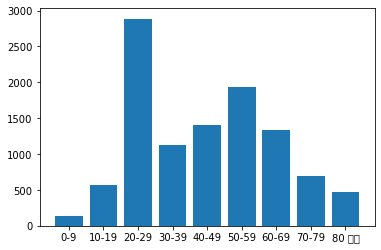

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      9 non-null      object
 1   확진자     9 non-null      object
dtypes: object(2)
memory usage: 216.0+ bytes


In [27]:
import json 
import requests
import xmltodict
import pandas as pd 
import matplotlib.pyplot as plt 

service_key='gZ1mis9Xa%2FvXgaEyc0FxYyZ7QvEq1u5WTu4U5thsna%2Bbp3lNV0RztdYSw%2FIuvOIZkJWjETFZRUMG%2FcpQuJgHwA%3D%3D'
request_url='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey='+service_key+'&pageNo=1&numOfRows=10&startCreateDt=20200310&endCreateDt=20200414&'

res = requests.get(request_url)
xml_data = xmltodict.parse(res.text)
json_raw = json.dumps(xml_data)
json_data = json.loads(json_raw)
data = []
for item in json_data['response']['body']['items']['item']:
    # print(item)
    data.append(item)
data

df = pd.DataFrame(data)
df
df.columns=['확진자','확진률','등록일시분초','치명률','사망자','사망률','구분','게시글번호','수정일시분초']
df.head()

#연령별 /확진자수 그래프 (2020-04-14 기준)
df['구분'].unique()
df.shape

df['등록일자']=pd.to_datetime(df['등록일시분초']).dt.strftime('%Y-%m-%d')
# df.head()df.groupby(by='등록일자').count()
# df.info()

df2 = df[df['등록일자'] == '2020-04-14'] 
df3=df2.iloc[:9,[6,0]]
df3
plt.bar(df3['구분'],df3['확진자'].astype(float))
plt.show()
df3.info()



735
250


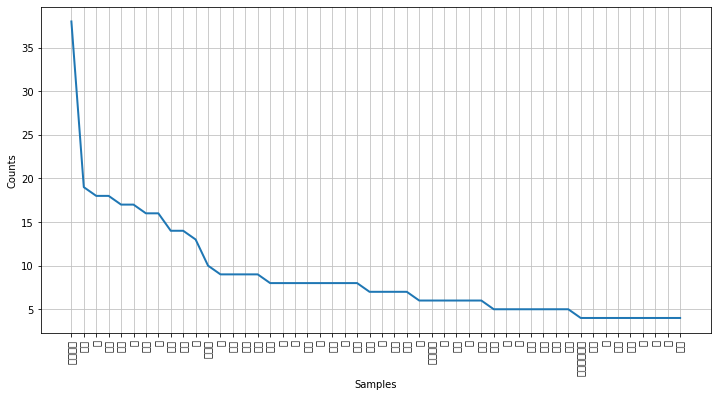

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

In [42]:
import nltk
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()
doc_ko

from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

ko = nltk.Text(tokens_ko, name = '대한민국 국회 의한 제 1809890호')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

stop_words=['.','(',')',',',"'",'%','-','X',').','x','의','자','에','안','번','호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

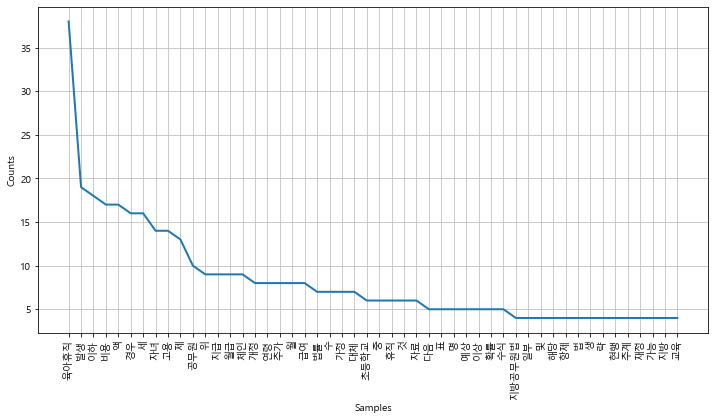

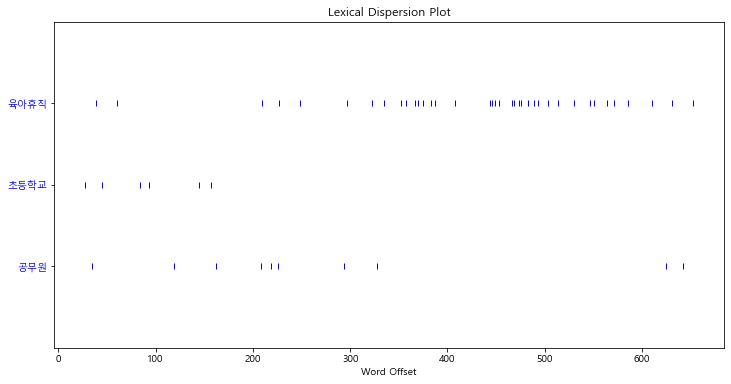

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 
초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

ko = nltk.Text(ko, name = '대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

ko.count('초등학교')
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])
ko.concordance('초등학교')
ko.collocations()





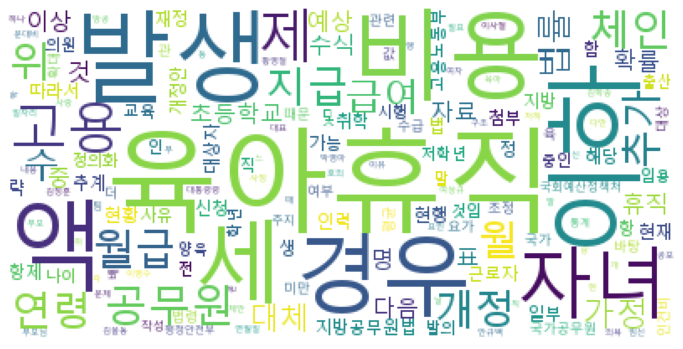

In [65]:
from wordcloud import WordCloud

data = ko.vocab().most_common(158)
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                        relative_scaling=0.2,
                        background_color='white',
                        ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()